In [1]:
from sklearn import datasets
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def load_boston(ratio=0.8):
    X, Y = datasets.load_boston(True)
    Y.shape = -1, 1
    
    # normalization
    X = X/80
    Y = Y/(np.max(Y) - np.min(Y))
    
    num_samples = len(Y)
    num_train = math.ceil(num_samples * ratio)
    
    # 随机打乱数据
    idx = np.random.permutation(np.arange(num_samples))
    traindata = X[idx[:num_train]], Y[idx[:num_train]]
    validdata = X[idx[num_train:]], Y[idx[num_train:]]
    
    return traindata, validdata

In [3]:
(X_train, Y_train), (X_valid, Y_valid) = load_boston()

# MLP Quiz

## 内容

利用$\hat{Y} = f_2\circ\phi\circ f_1 (X)$和梯度下降法来拟合boston数据集，即求解最优化问题：$min_{W, b} L(\hat{Y}, Y)$

其中：

* $Z_0 = X$, 其中 $X \in \mathbb{R}^{N\times n_{in}}$
* $Z_1 = f_1(Z_0) := Z_0W_1^T + b_1$, 其中 $W_1 \in \mathbb{R}^{n_{mid}\times n_{in}}, b_1 \in \mathbb{R}^{n_{mid}}$
* $Z_2 = \phi_2(Z_1) := \frac{1}{1+e^{-Z_1}}$, 其中指数运算为逐元素运算，即$e^{X}_i := e^{X_i}$
* $Z_3 = f_2(Z_2) := Z_2W_2^T + b2$, 其中 $W_2 \in \mathbb{R}^{n_{out}\times n_{mid}}, b_2 \in \mathbb{R}^{n_{out}}$
* $\hat{Y} = Z_3$
* $L(\hat{Y}, Y) := \frac{1}{2} \sum_{i=1}^{N} (\hat{Y_i} - Y_i)^2$

关于boston数据集：$n_{in}=13, n_{out}=1$，为了降低计算量，设定$n_{mid} = 30$

## 评分

1. （4分）给出$\frac{\partial L}{\partial W_1}, \frac{\partial L}{\partial b_1}, \frac{\partial L}{\partial W_2}, \frac{\partial L}{\partial b_2}$的计算表达式，并注明其中每一个矩阵的尺寸（纸质或pdf）
2. （4分）补充完整下述代码
3. （2分）性能：服务器空载情况下运行一次完整的训练时间低于10s （Baseline为3.5s）

## 提交

提交到`ftp://ftp.lflab.cn/AI_homework/Graduate/quiz/`下

## 参考

* 矩阵关于标量的导数：$(\frac{\partial{Y}}{\partial{X}})_{ij} := \frac{\partial{Y_ij}}{\partial{X}}$, 其中 $Y \in \mathbb{R}^{m\times n}, X \in \mathbb{R}$
* 向量关于向量的导数：$(\frac{\partial{Y}}{\partial{X}})_{ij} := \frac{\partial{Y_i}}{\partial{X_j}}$, 其中 $Y \in \mathbb{R}^{m\times 1}, X \in \mathbb{R}^{n\times 1}$
* 标量关于矩阵的导数：$(\frac{\partial{Y}}{\partial{X}})_{ij} := \frac{\partial{Y}}{\partial{X_ij}}$, 其中 $Y \in \mathbb{R}, X \in \mathbb{R}^{m\times n}$

# 实现

$f_1, f_2$称为线性层

In [4]:
class Linear():
    def __init__(self, in_features: int, out_features: int):
        raise NotImplementedError("实现它")
    
    def __call__(self, X):
        return self.forward(X)
    
    def forward(self, X):
        raise NotImplementedError("实现它")

$\phi$称为激活函数（非线性层）

In [5]:
class Sigmoid():
    """phi"""
    def __call__(self, X):
        return self.forward(X)
    
    def forward(self, X):
        raise NotImplementedError("实现它")

In [6]:
class MLP:
    def __init__(self, in_features: int, mid_features: int, out_features: int):
        self.f1 = Linear(in_features, mid_features)
        self.phi = Sigmoid()
        self.f2 = Linear(mid_features, out_features)
        
    def __call__(self, X):
        return self.f2(self.phi(self.f1(X)))
        
    def forward(self, X):
        Z0 = X
        Z1 = self.f1(X)
        Z2 = self.phi(Z1)
        Z3 = self.f2(Z2)
        return [Z0, Z1, Z2, Z3]
    
    def grad(self, Y, Z): # 3分
        Z0, Z1, Z2, Z3 = Z[0], Z[1], Z[2], Z[3]

        raise NotImplementedError("实现它")

        return dLdW1, dLdb1, dLdW2, dLdb2

In [7]:
def loss(Y_real, Y_pred):
    return 0.5 * np.sum((Y_real - Y_pred)**2)

In [8]:
class GradientDescent:
    def __init__(self, step=1e-3):
        self.step = step
        
    def update(self, model:MLP, dLdW1, dLdb1, dLdW2, dLdb2):
        """利用梯度dW来更新f的权重"""
        raise NotImplementedError("实现它")

In [9]:
%%time
num_features = X_train.shape[-1]
model = MLP(num_features, 30, 1)
opt = GradientDescent(1e-6)

valid_losses = []
train_losses = []
for i in range(1000):
    X, Y = X_train, Y_train
    
    # 1分
    # 1. 计算梯度
    # 2. 更新权重
    raise NotImplementedError("实现它")

    # 3. 存储中间状态
    Y_out = None # FIXME
    cur_valid_loss = loss(Y_valid, model(X_valid))
    cur_train_loss = loss(Y, Y_out)
    valid_losses.append(cur_valid_loss) 
    train_losses.append(cur_train_loss)
    
    if i%100 == 0:
        print(f"Iter {i}: loss {cur_train_loss:.4f}, valid loss {cur_valid_loss:.4f}")

Iter 0: loss 54.8086, valid loss 12.8588
Iter 100: loss 8.5929, valid loss 2.0355
Iter 200: loss 8.5417, valid loss 2.0210
Iter 300: loss 8.5267, valid loss 2.0173
Iter 400: loss 8.5118, valid loss 2.0136
Iter 500: loss 8.4970, valid loss 2.0100
Iter 600: loss 8.4822, valid loss 2.0063
Iter 700: loss 8.4674, valid loss 2.0027
Iter 800: loss 8.4527, valid loss 1.9991
Iter 900: loss 8.4380, valid loss 1.9955
CPU times: user 56.5 s, sys: 1min 21s, total: 2min 17s
Wall time: 3.01 s


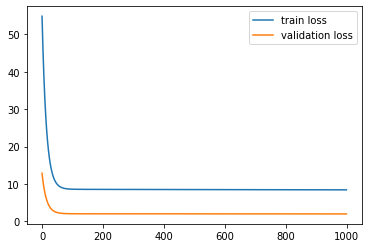

In [10]:
plt.plot(train_losses)
plt.plot(valid_losses)
plt.legend(["train loss", "validation loss"])